In [1]:
import os

TEST_DIR = "test_input"
CHAIN_FILE = os.path.join(TEST_DIR, "hg38.mm10.chr11.chain") 
TABLE_FILE = os.path.join(TEST_DIR, "table.dat")
BDB_FILE = os.path.join(TEST_DIR, "hg38.mm10.chr11.bdb")
with open(CHAIN_FILE, "r") as f:
    CHAIN_IDS = [int(x.rstrip().split()[-1]) for x in f.readlines() if x.startswith("chain")]
    CHAINS_NUM = len(CHAIN_IDS)
print(f"CHAIN FILE: {CHAIN_FILE}; TABLE_FILE: {TABLE_FILE}; CHAINS_NUM: {CHAINS_NUM} ")

CHAIN FILE: test_input/hg38.mm10.chr11.chain; TABLE_FILE: test_input/table.dat; CHAINS_NUM: 149909 


In [2]:
%matplotlib inline
from chain_index import chain_index
from datetime import datetime as dt
import matplotlib.pyplot as plt
import random
from statistics import mean, median
import bsddb3

In [3]:
times_chain_index = []
chunk_size = 1000
random.shuffle(CHAIN_IDS)
chunk = CHAIN_IDS[:chunk_size]

for i in range(chunk_size):
    t0 = dt.now()
    chain_id = CHAIN_IDS[i]
    extractor = chain_index.chain_index()
    ch = extractor.extract_chain(CHAIN_FILE, TABLE_FILE, chain_id)
    t1 = dt.now() - t0
    times_chain_index.append(t1.total_seconds())

In [4]:
times_bdb_index = []

for i in range(chunk_size):
    t0 = dt.now()
    chain_id = CHAIN_IDS[i]
    db = bsddb3.btopen(BDB_FILE, "r")
    _ = db[str(chain_id).encode()]
    db.close()
    t1 = dt.now() - t0
    times_bdb_index.append(t1.total_seconds())

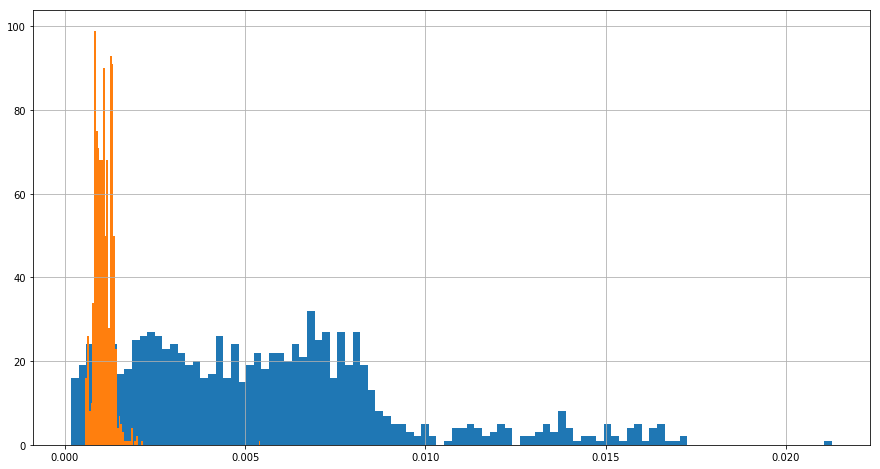

My Mean time: 0.005475467s; median: 0.005089s
BDB: 0.001076336s; median: 0.001062s


In [5]:
fig = plt.figure(figsize=(15, 8))
plt.hist(times_chain_index, bins=100)
plt.hist(times_bdb_index, bins=100)
plt.grid()
# plt.xlim(0, 0.005)
plt.show()
print(f"My Mean time: {mean(times_chain_index)}s; median: {median(times_chain_index)}s")
print(f"BDB: {mean(times_bdb_index)}s; median: {median(times_bdb_index)}s")